# k-Nearest Neighbor in Python

In [1]:
# Load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [10]:
# Load in Data
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Question Setup 
## With this analysis, you are trying to predict which type of iris (species) a flower will be based on the other variables in the dataset - length and width of the various flower parts.

# Data Wrangling
## Scaling your data

In [4]:
scaler = StandardScaler()
scaler.fit(iris.drop('species', axis=1))
scaledVariables = scaler.transform(iris.drop('species',axis=1))
irisScaled = pd.DataFrame(scaledVariables, columns=iris.columns[:-1])
irisScaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Creating X and Y data set

In [5]:
x = irisScaled
y = iris['species']

## Train Test Split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

# KNN Analysis

In [8]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(pred)

['setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa'
 'setosa' 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'setosa' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor']


## Make the data usable

In [9]:
print(confusion_matrix(y_test, pred))


[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


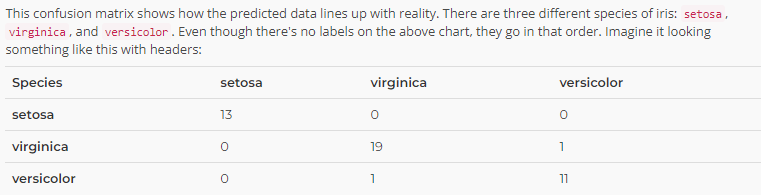

In [12]:
# Check for accuracy
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.95      0.95      0.95        20
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Choose the best model

In [13]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

## Plot the error rate

Text(0, 0.5, 'Error Rate')

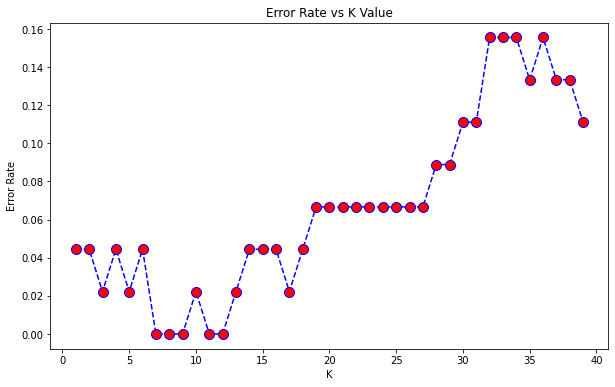

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## We can see that 7, 8, 9, 11 and 12 are equally low

## Run the Final Model

In [18]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]


In [19]:
# Check for accuracy
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        20
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

